## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# File Path
mouse_metadata_path = "Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results = pd.read_csv(study_results_path)
study_results.head()


,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset by using merge method
# Display the data table for preview

merge_data = pd.merge(mouse_metadata, study_results, on= "Mouse ID")
merge_data.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [5]:
# Checking the number of mice using value counts
merge_data['Mouse ID'].value_counts()

g989    13
z795    10
r701    10
c402    10
q633    10
        ..
v199     1
x226     1
u153     1
h428     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupli_count=len(merge_data)-len(merge_data.drop_duplicates())
dupli_count


1

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice = merge_data[merge_data.duplicated(["Mouse ID","Timepoint"])]
dup_mice = pd.DataFrame({"Mouse ID":dup_mice["Mouse ID"].unique()})

dup_mice=merge_data.loc[merge_data["Mouse ID"]==str(dup_mice.iloc[0,0]),:]
dup_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_data.loc[merge_data['Mouse ID']!='g989']
clean_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [71]:
# Checking the number of mice in the clean DataFrame by using unique method
clean_mice= pd.unique(clean_df['Mouse ID'])
len(clean_mice)

248

## Summary Statistics

In [72]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_df= clean_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumour volume.

tumour_mean = summary_df.mean()['Tumour Volume (mm3)']
tumour_median = summary_df.median()['Tumour Volume (mm3)']
tumour_variance = summary_df.var()['Tumour Volume (mm3)']
tumour_stdev = summary_df.std()['Tumour Volume (mm3)']
tumour_sem = summary_df.sem()['Tumour Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.

summary_drug_regimen = pd.DataFrame({
        'Mean': tumour_mean,
        'Median': tumour_median,
        'Variance': tumour_variance,
        'Standard Deviation': tumour_stdev,
        'SEM': tumour_sem,
      
        })

summary_drug_regimen


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg_data=summary_df.agg({"Tumour Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_agg_data.head(100)

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

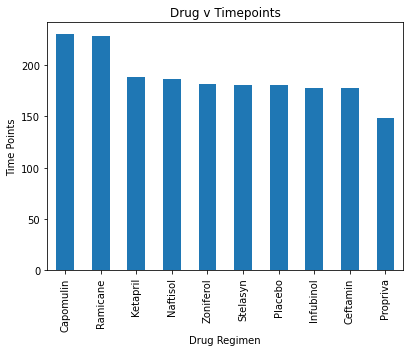

In [74]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drugs_df = clean_df['Drug Regimen'].value_counts()

drugs_df.plot(kind="bar", figsize=(5.8,5))
plt.xlabel("Drug Regimen")
plt.ylabel("Time Points")
plt.title("Drug v Timepoints")
plt.tight_layout()


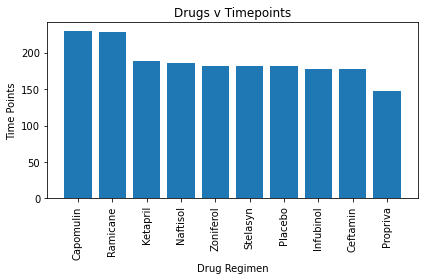

In [75]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = drugs_df.index.values
y_axis = drugs_df.values


plt.title("Drugs v Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Time Points")

plt.bar(x_axis, y_axis)
plt.xticks(rotation="vertical")
plt.tight_layout()



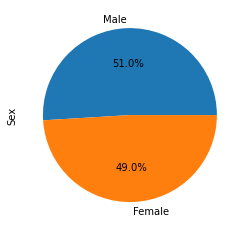

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
fm_count = clean_df['Sex'].value_counts()

fm_count.plot(kind="pie", autopct="%1.1f%%")


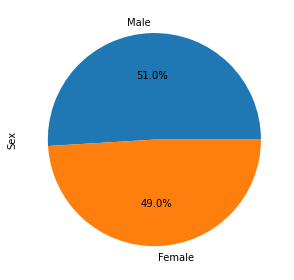

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(fm_count.values, labels=fm_count.index.values,autopct="%1.1f%%")
plt.ylabel('Sex')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [139]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(clean_df.groupby(['Mouse ID'])['Timepoint'].max())

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint

clean_max_df = pd.merge(clean_df, max_timepoint, how='right', on=('Mouse ID', 'Timepoint'))

clean_max_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
5,s508,Ramicane,Male,1,17,45,30.276232,0
6,f966,Capomulin,Male,16,17,20,30.485985,0
7,m546,Ramicane,Male,18,16,45,30.564625,1
8,z578,Ramicane,Male,11,16,45,30.638696,0
9,j913,Ramicane,Female,4,17,45,31.560470,1


In [103]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumour vol data (for plotting)

Cap_tmr = []
Ram_tmr = []
Inf_tmr = []
Cef_tmr = []
  
# Locate the rows which contain mice on each drug and get the tumour volumes
#Use for Loop statement to locate each drug and tumour volumes
for index, row in clean_max_df.iterrows(): 

    if row["Drug Regimen"] == "Capomulin":
        Cap_tmr.append(row['Tumour Volume (mm3)'])
    if row["Drug Regimen"] == "Ramicane":
        Ram_tmr.append(row['Tumour Volume (mm3)'])
    if row["Drug Regimen"] == "Infubinol":
        Inf_tmr.append(row['Tumour Volume (mm3)'])
    if row["Drug Regimen"] == 'Ceftamin':
        Cef_tmr.append(row['Tumour Volume (mm3)'])

summary_drug = pd.DataFrame({
        'Capomulin': Cap_tmr,
        'Ramicane': Ram_tmr,
        'Infubinol': Inf_tmr,
        'Ceftamine': Cef_tmr,
        })

summary_drug.head(100)



,Capomulin,Ramicane,Infubinol,Ceftamine
0,23.343598,22.050126,67.973419,62.999356
1,28.484033,29.128472,65.525743,45.000000
2,28.430964,30.276232,57.031862,56.057749
3,30.485985,30.564625,66.083066,55.742829
4,31.023923,30.638696,72.226731,48.722078
5,31.896238,31.560470,36.321346,47.784682
6,32.377357,31.095335,60.969711,61.849023
7,33.329098,33.397653,62.435404,68.923185
8,34.455298,32.978522,60.918767,67.748662
9,37.311846,33.562402,67.289621,57.918381


In [105]:
# Determine outliers using upper and lower bounds

upper_drugs = summary_drug.max()
upper_drugs

Capomulin    47.685963
Ramicane     45.220869
Infubinol    72.226731
Ceftamine    68.923185
dtype: float64

In [106]:
# Determine outliers using upper and lower bounds
lower_drugs = summary_drug.min()
lower_drugs

Capomulin    23.343598
Ramicane     22.050126
Infubinol    36.321346
Ceftamine    45.000000
dtype: float64

In [116]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Capomulin
##Determine the value in the ranges
quartile_Cap = summary_drug['Capomulin'].quantile([.25, .5, .75])
lower_Cap = quartile_Cap[.25]
med_Cap = quartile_Cap[.5]
upper_Cap = quartile_Cap[.75]
## IQR formula: IQR = UPPER QR = LOWER QR
iqr_Cap = upper_Cap - lower_Cap
## Below lower bound values and exceeding upper bound values are potential outliers
lowb_Cap = lower_Cap - (1.5 *iqr_Cap)
upb_Cap = upper_Cap + (1.5 *iqr_Cap)


In [117]:
#Ramicane
##Determine the value in the ranges
quartile_Ram = summary_drug['Ramicane'].quantile([.25, .5, .75])
lower_Ram = quartile_Ram[.25]
med_Ram = quartile_Ram[.5]
upper_Ram = quartile_Ram[.75]
## IQR formula: IQR = UPPER QR = LOWER QR
iqr_Ram = upper_Ram - lower_Ram
## Below lower bound values and exceeding upper bound values are potential outliers
lowb_Ram = lower_Ram - (1.5 *iqr_Ram)
upb_Ram = upper_Ram + (1.5 *iqr_Ram)


In [118]:
#Infubinol
##Determine the value in the ranges
quartile_Inf = summary_drug['Infubinol'].quantile([.25, .5, .75])
lower_Inf = quartile_Inf[.25]
med_Inf = quartile_Inf[.5]
upper_Inf = quartile_Inf[.75]
## IQR formula: IQR = UPPER QR = LOWER QR
iqr_Inf = upper_Inf - lower_Inf
## Below lower bound values and exceeding upper bound values are potential outliers
lowb_Inf = lower_Inf - (1.5 *iqr_Inf)
upb_Inf = upper_Inf + (1.5 *iqr_Inf)

In [119]:
#Ceftamine
##Determine the value in the ranges
quartile_Cef = summary_drug['Ceftamine'].quantile([.25, .5, .75])
lower_Cef = quartile_Cef[.25]
med_Cef = quartile_Cef[.5]
upper_Cef = quartile_Cef[.75]
## IQR formula: IQR = UPPER QR = LOWER QR
iqr_Cef = upper_Cef - lower_Cef
## Below lower bound values and exceeding upper bound values are potential outliers
lowb_Cef = lower_Cef - (1.5 *iqr_Cef)
upb_Cef = upper_Cef + (1.5 *iqr_Cef)

In [169]:
#Print Summary of IQR for each drug and Potential Outliers

iqr_outliers = pd.DataFrame({
    "Drug": drug_list,
    "IQR": [iqr_Cap, iqr_Ram, iqr_Inf, iqr_Cef],
    "Upper Bound": [upb_Cap, upb_Ram, upb_Inf, upb_Cef],
    "Lower Bound": [lowb_Cap, lowb_Ram, lowb_Inf, lowb_Cef]
})

iqr_outliers.head(10)


,Drug,IQR,Upper Bound,Lower Bound
0,Capomulin,7.781863,51.832015,20.704562
1,Ramicane,9.098537,54.306811,17.912664
2,Infubinol,11.477135,82.741446,36.832905
3,Ceftamin,15.577752,87.666458,25.355450


In [125]:
print(f"Values exceeding Upper Bound column are potential Outliers")
print(f"Values below Lower Bound column are potential Outliers ")

Values exceeding Upper Bound column are potential Outliers
Values below Lower Bound column are potential Outliers 


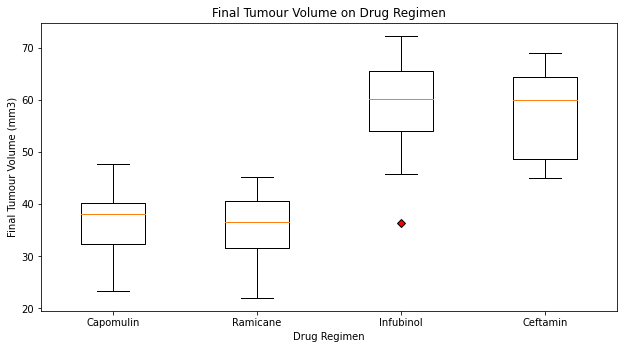

In [168]:
# # Generate a box plot of the final tumour volume of each mouse across four regimens of interest
drug_tmr = [Cap_tmr, Ram_tmr, Inf_tmr, Cef_tmr]

fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0,0,1,1])
red_diamond = dict(markerfacecolor='r', marker='D')
plt.boxplot(drug_tmr, labels=drug_list,flierprops=red_diamond) 

ax.set_title('Final Tumour Volume on Drug Regimen')
ax.set_ylabel('Final Tumour Volume (mm3)')
ax.set_xlabel('Drug Regimen')

plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumour Volumr (mm3)')

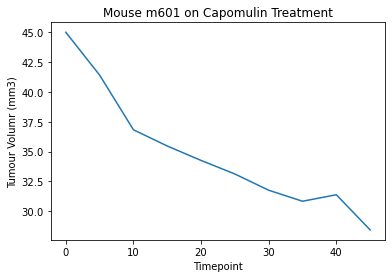

In [143]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
#Choose a mouse that uses Capomulin(noet:refer back to DataFrame called clean_df) and isolate chosen mouse data using loc method

Cap_m601 = clean_df.loc[clean_df['Mouse ID'] == "m601", :]
Cap_m601

#Set data for x and y axis of line plot
##Use Timepoint as x-axis
x_axis = Cap_m601['Timepoint']
##Use Tumour Volume (mm3) as y- axis
y_axis = Cap_m601['Tumour Volume (mm3)']

#Plot line graph
plt.plot(x_axis, y_axis, linewidth = 1.5, markersize = 8)
plt.title('Mouse m601 on Capomulin Treatment')
plt.xlabel('Timepoint')
plt.ylabel('Tumour Volumr (mm3)')

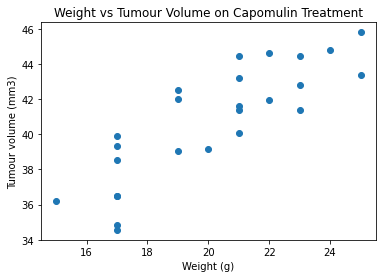

In [163]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
#Find all mice that has treatment of Capomulin using loc method
Cap_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', :]
Cap_df

#Calculate Average value of Mice on Capomulin Treatment 
cap_tmr_avg = Cap_df.groupby(['Mouse ID']).mean()

#Visualise data of Tumour Volume and Mouse Weight using scatterplot
##Set x and y axis
x = (cap_tmr_avg['Weight (g)'])
y = (cap_tmr_avg['Tumour Volume (mm3)'])
##Plot scatterplot
plt.scatter(x, y)
plt.title('Weight vs Tumour Volume on Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Tumour volume (mm3)')
plt.show()


## Correlation and Regression

In [165]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
##Find Correlation Coefficient using pearsonr
## Use the same data for x = (cap_tmr_avg['Weight (g)']), and y = (cap_tmr_avg['Tumour Volume (mm3)'])
correlation = round(st.pearsonr(x, y)[0], 2)
correlation

0.84

In [166]:
#Find values for slope and intercept using lingress
lingress = st.linregress(x,y)
lingress


LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

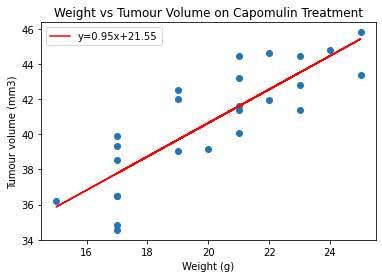

In [167]:
#Plot the linear regression model
##Use values on lingress for slope and intercept
slope = 0.9544396890241045
intercept = 21.552160532685015
##Calculate the linear line using formula: slope*(data which is Weight (g)) + intercept
line = slope*(x) + intercept

#Incorprate linear regression line into  the scatter plot above
plt.scatter(x, y)
plt.title('Weight vs Tumour Volume on Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Tumour volume (mm3)')

plt.plot(x, line, 'r', label = 'y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.legend()
plt.show()